<a href="https://colab.research.google.com/github/cedamusk/AI-N-ML/blob/main/Mineral_classification_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install google-colab tensorflow numpy matplotlib seaborn scikit-learn

In [ ]:
import os
from google.colab import drive
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [ ]:
def mount_google_drive():
  drive.mount('/content/drive')

In [ ]:
def check_directory_contents(path):
  for item in os.listdir(path):
    print(item)

In [ ]:
mount_google_drive()
dataset_path='/content/drive/MyDrive/minet'
check_directory_contents(dataset_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
biotite
pyrite
muscovite
bornite
malachite
quartz
chrysocolla


In [ ]:
def create_mineral_cnn(input_shape, num_classes):
  model=models.Sequential([
      layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
      layers.BatchNormalization(),
      layers.MaxPooling2D((2,2)),

      layers.Conv2D(128, (3,3), activation='relu'),
      layers.BatchNormalization(),
      layers.MaxPooling2D((2,2)),

      layers.Flatten(),
      layers.Dropout(0.5),
      layers.Dense(256, activation='relu'),
      layers.BatchNormalization(),
      layers.Dropout(0.5),
      layers.Dense(num_classes, activation='softmax')
  ])

  return model

In [ ]:
def prepare_data(data_dir, img_height=224, img_width=224, batch_size=32):
  train_datagen=ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest',
      validation_split=0.2
  )

  train_generator=train_datagen.flow_from_directory(
      data_dir,
      target_size=(img_height, img_width),
      batch_size=batch_size,
      class_mode='categorical',
      subset='training'
  )

  validation_generator=train_datagen.flow_from_directory(
      data_dir,
      target_size=(img_height, img_width),
      batch_size=batch_size,
      class_mode='categorical',
      subset='validation'
  )

  return train_generator, validation_generator

In [ ]:
def train_model(model, train_generator, validation_generator, epochs=50):
  model.compile(
      optimizer='adam',
      loss='categorical_crossentropy',
      metrics=['accuracy']
  )

  early_stopping=tf.keras.callbacks.EarlyStopping(
      monitor='val_loss',
      patience=10,
      restore_best_weights=True
  )

  reduce_lr=tf.keras.callbacks.ReduceLROnPlateau(
      monitor='val_loss',
      factor=0.2,
      patience=5,
      min_lr=1e-6
  )

  history=model.fit(
      train_generator,
      validation_data=validation_generator,
      epochs=epochs,
      callbacks=[early_stopping, reduce_lr]
  )

  return history

In [ ]:
def plot_training_history(history):
  fig, (ax1, ax2)=plt.subplots(1,2, figsize=(12,4))
  ax1.plot(history.history['accuracy'])
  ax1.plot(history.history['val_accuracy'])
  ax1.set_title('Model Accuracy')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Accuracy')
  ax1.legend(['Train', 'Validation'])

  ax2.plot(history.history['loss'])
  ax2.plot(history.history['val_loss'])
  ax2.set_title('Model Loss')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Loss')
  ax2.legend(['Train', 'Validation'])

  plt.tight_layout()
  plt.show()

In [ ]:
def main():
  DATA_DIR='/content/drive/MyDrive/minet'
  IMG_HEIGHT=224
  IMG_WIDTH=224
  BATCH_SIZE=32
  EPOCHS=50

  train_generator, validation_generator=prepare_data(
      DATA_DIR,
      IMG_HEIGHT,
      IMG_WIDTH,
      BATCH_SIZE
  )

  num_classes=len(train_generator.class_indices)
  input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)

  model=create_mineral_cnn(input_shape, num_classes)

  history=train_model(model, train_generator, validation_generator, EPOCHS)

  plot_training_history(history)
  model.save('mineral_classifier.h5')

Found 768 images belonging to 7 classes.
Found 189 images belonging to 7 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


24/24 ━━━━━━━━━━━━━━━━━━━━ 406s 14s/step - accuracy: 0.3841 - loss: 2.6142 - val_accuracy: 0.2063 - val_loss: 1.8997 - learning_rate: 0.0010
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 243s 10s/step - accuracy: 0.5952 - loss: 1.2246 - val_accuracy: 0.2434 - val_loss: 1.8957 - learning_rate: 0.0010
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 238s 10s/step - accuracy: 0.6613 - loss: 0.9809 - val_accuracy: 0.3280 - val_loss: 1.9187 - learning_rate: 0.0010
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 235s 9s/step - accuracy: 0.6665 - loss: 1.0223 - val_accuracy: 0.2381 - val_loss: 2.0098 - learning_rate: 0.0010
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 242s 10s/step - accuracy: 0.6914 - loss: 0.9211 - val_accuracy: 0.2857 - val_loss: 1.7967 - learning_rate: 0.0010
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 252s 9s/step - accuracy: 0.6946 - loss: 0.8918 - val_accuracy: 0.3386 - val_loss: 1.7544 - learning_rate: 0.0010
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 242s 10s/step - accuracy: 0.7154 - loss: 0.8289 - val_accuracy:

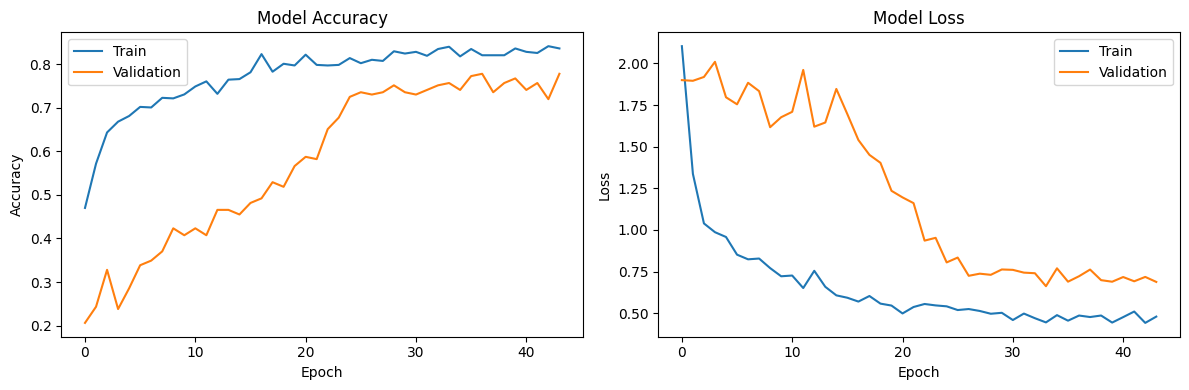

In [ ]:
if __name__=='__main__':
  main()